# Neural Networks in Action

En esta clase vamos a aprender a utilizar la libreria de keras para realizar implementaciones de redes neuronales. Utilizaremos un ejemplo de regresión y uno de clasificación, utilizando bases de datos que se encuentran en keras

## Implementación de una red neuronal para clasificación.

En este caso utilizaremos el problema de clasificación de digitos del 0 al 9.

In [3]:
from keras.datasets import mnist
# Dividimos lso datos en entrenamiento y pureba
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Cantidad de datos
print('El tamaño de los datos de entrenamiento es:', train_images.shape)
print('El tamaño de los labels de entrenamiento es:', train_labels.shape)
print('El tamaño de los datos de prueba es:', test_images.shape)
print('El tamaño de los labels de prueba es:', test_labels.shape)

El tamaño de los datos de entrenamiento es: (60000, 28, 28)
El tamaño de los labels de entrenamiento es: (60000,)
El tamaño de los datos de prueba es: (10000, 28, 28)
El tamaño de los labels de prueba es: (10000,)


In [6]:
train_labels[1040]

0

Ahora observemos alguno de los numeros:

<function matplotlib.pyplot.show(close=None, block=None)>

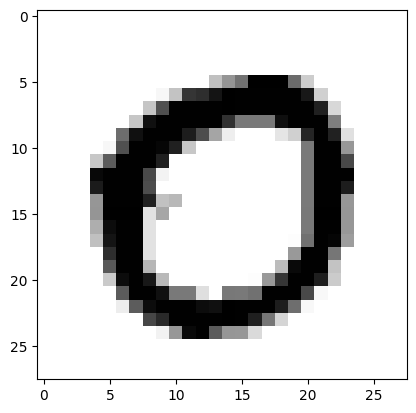

In [7]:
digit = train_images[1040]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show

Ahora creamos la arquitectura de la red. Esto se hace utilizando un modelo secuencial de capas.

In [8]:
# Inicializando los parametros de la red neuronal

from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(20, activation='sigmoid', input_shape=(28*28,)))
network.add(layers.Dense(15, activation='sigmoid'))
network.add(layers.Dense(10,activation='sigmoid'))
network.compile(optimizer = 'rmsprop',
                loss='categorical_crossentropy',
               metrics=['accuracy'])

Ahora preprocesamos lso datos par apoder ingresarlos al modelo:

In [9]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [10]:
train_images.shape

(60000, 784)

Ahora preparamos las etiquetas volviendolas variables categoricas:

In [11]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
train_labels[1040]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Ahora entrenamos la red:

In [14]:
network.fit(train_images, train_labels, epochs=7, batch_size = 128)

Epoch 1/7
469/469 [==============================] - 2s 3ms/step - loss: 1.7109 - accuracy: 0.5561
Epoch 2/7
469/469 [==============================] - 1s 3ms/step - loss: 0.8691 - accuracy: 0.8195
Epoch 3/7
469/469 [==============================] - 1s 3ms/step - loss: 0.5255 - accuracy: 0.8743
Epoch 4/7
469/469 [==============================] - 1s 3ms/step - loss: 0.3838 - accuracy: 0.9006
Epoch 5/7
469/469 [==============================] - 1s 3ms/step - loss: 0.3130 - accuracy: 0.9152
Epoch 6/7
469/469 [==============================] - 1s 3ms/step - loss: 0.2723 - accuracy: 0.9243
Epoch 7/7
469/469 [==============================] - 1s 3ms/step - loss: 0.2450 - accuracy: 0.9309


In [15]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2368 - accuracy: 0.9333
test_acc: 0.9333000183105469


## Implementación de una red Neuronal para Regresión

Para este casa utilizaremos los datos del Boston Housing dataset.

In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data,test_targets) = boston_housing.load_data()

print('El tamaño de los datos de entrenamiento es:', train_data.shape)
print('El tamaño de los labels de entrenamiento es:', train_targets.shape)
print('El tamaño de los datos de prueba es:', test_data.shape)
print('El tamaño de los labels de prueba es:', test_targets.shape)

El tamaño de los datos de entrenamiento es: (404, 13)
El tamaño de los labels de entrenamiento es: (404,)
El tamaño de los datos de prueba es: (102, 13)
El tamaño de los labels de prueba es: (102,)


In [12]:
train_targets[0]

15.2

In [14]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

Ahora normalizamos los datos:

In [16]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /=std

Ahora construimos la red:

In [17]:
model = models.Sequential()
model.add(layers.Dense(200,activation = 'relu',
                       input_shape=(train_data.shape[1],)))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [18]:
model.fit(train_data, train_targets, epochs=70, batch_size = 128, verbose=1)

Epoch 1/70
4/4 [==============================] - 1s 3ms/step - loss: 586.8945 - mae: 22.3761
Epoch 2/70
4/4 [==============================] - 0s 3ms/step - loss: 561.5857 - mae: 21.8479
Epoch 3/70
4/4 [==============================] - 0s 2ms/step - loss: 545.2103 - mae: 21.4734
Epoch 4/70
4/4 [==============================] - 0s 2ms/step - loss: 529.4838 - mae: 21.1268
Epoch 5/70
4/4 [==============================] - 0s 3ms/step - loss: 515.5053 - mae: 20.8070
Epoch 6/70
4/4 [==============================] - 0s 3ms/step - loss: 501.3704 - mae: 20.4708
Epoch 7/70
4/4 [==============================] - 0s 2ms/step - loss: 487.3271 - mae: 20.1355
Epoch 8/70
4/4 [==============================] - 0s 3ms/step - loss: 473.1946 - mae: 19.7938
Epoch 9/70
4/4 [==============================] - 0s 2ms/step - loss: 459.6118 - mae: 19.4535
Epoch 10/70
4/4 [==============================] - 0s 3ms/step - loss: 444.8656 - mae: 19.0993
Epoch 11/70
4/4 [==============================] - 0s 2ms/s

In [19]:
test_loss, test_acc = model.evaluate(test_data, test_targets)
print('test_mae:', test_acc)

4/4 [==============================] - 0s 3ms/step - loss: 29.2694 - mae: 4.2630
test_mae: 4.26299524307251


4/4 [==============================] - 0s 2ms/step


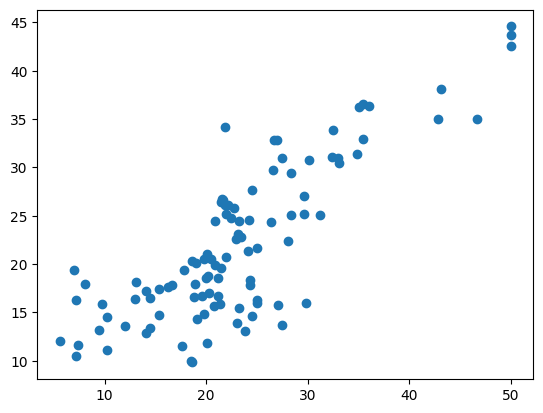

In [20]:
test_pred = model.predict(test_data)
plt.scatter(test_targets,test_pred)